In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

In [3]:
data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [4]:
data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [5]:
X = data.iloc[:,:-2] 
y = data.iloc[:,-1]  
X.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [6]:
y.unique()

array(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

In [7]:
X_test = test_data.iloc[:,:-2] 
y_test = test_data.iloc[:,-1] 

In [26]:
from sklearn import tree
decision_tree_model = tree.DecisionTreeClassifier()
decision_tree_pred = decision_tree_model.fit(X, y)
decision_tree_pred.score(X_test, y_test)

0.8629114353579912

In [31]:
decision_tree = decision_tree_pred.score(X_test, y_test)

In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 20)
knn_pred = knn.fit(X, y)
print(knn_pred.score(X_test, y_test))

0.9056667797760435


In [32]:
k_nearest = knn_pred.score(X_test, y_test)

In [28]:
from sklearn.svm import SVC
svc = SVC()
svc_pred = svc.fit(X, y)
svc_pred.score(X_test, y_test)

/Users/rishikoushal/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.9402782490668476

In [33]:
support_vector = svc_pred.score(X_test, y_test)

In [29]:
from sklearn.ensemble import RandomForestClassifier
Random_forest = RandomForestClassifier()
Random_forest_pred = Random_forest.fit(X, y)
Random_forest_pred.score(X_test, y_test)

/Users/rishikoushal/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9172039362063115

In [34]:
random_forest = Random_forest_pred.score(X_test, y_test)

In [36]:
from sklearn.ensemble import AdaBoostClassifier
AdaBoost = AdaBoostClassifier() #n_estimators=50, learning_rate = 1
AdaBoost_pred = AdaBoost.fit(X, y)
AdaBoost_pred.score(X_test, y_test)

0.5310485239226331

In [37]:
boost_classifier = AdaBoost_pred.score(X_test, y_test)

In [30]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(15, 15))
mlp_pred = mlp.fit(X, y)
mlp_pred.score(X_test, y_test)

0.9545300305395318

In [38]:
multilayer_perceptron = mlp_pred.score(X_test, y_test)

In [48]:
scores = [decision_tree, k_nearest, support_vector, random_forest, boost_classifier, multilayer_perceptron ]
labels = ['decision tree','knn','SVM','RF','Boost','MLP']
d = {}
for i in range(len(scores)):
    d[labels[i]] = scores[i]
print(d)
print(scores)

{'decision tree': 0.8629114353579912, 'knn': 0.9056667797760435, 'SVM': 0.9402782490668476, 'RF': 0.9172039362063115, 'Boost': 0.5310485239226331, 'MLP': 0.9545300305395318}
[0.8629114353579912, 0.9056667797760435, 0.9402782490668476, 0.9172039362063115, 0.5310485239226331, 0.9545300305395318]


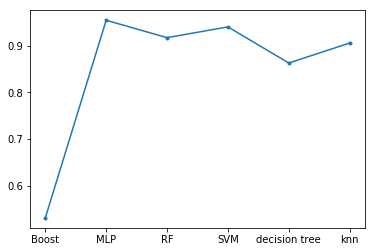

In [51]:
lists = sorted(d.items()) 
x, y = zip(*lists) 
plt.plot(x, y,marker='.')
plt.show()